In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings


In [2]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [3]:
data = pd.read_csv('revisedDataset.csv',index_col ='date',parse_dates=True)

data = data.bfill()

X=data.iloc[:,0:-1].values
y=data.iloc[:,-1].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [4]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def rs_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rs =cross_val_score(model,X_train, y_train, cv = kf,scoring='r2')
    return(rs)

In [5]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression()
score = rmsle_cv(lr)
rsscore = rs_cv(lr)

In [6]:
print(score)
print("\nLR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

print(rsscore)
print("\nLR score: {:.4f} ({:.4f})\n".format(rsscore.mean(), rsscore.std()))



[43.16764299 45.73403317 40.90564205 35.26022311 49.35832054]

LR score: 42.8852 (4.7362)

[0.82986474 0.69896737 0.66503611 0.92803996 0.74252228]

LR score: 0.7729 (0.0952)



In [7]:
#Random forest
RF = RandomForestRegressor(random_state=1, n_estimators=10)
score = rmsle_cv(RF)
rsscore = rs_cv(RF)
print(score)
print("\nRF score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

print(rsscore)
print("\nRF score: {:.4f} ({:.4f})\n".format(rsscore.mean(), rsscore.std()))

[42.10386364 46.28302064 36.40646463 31.3814573  52.61749742]

RF score: 41.7585 (7.4140)

[0.8381467  0.69169685 0.73466864 0.94300096 0.70739665]

RF score: 0.7830 (0.0949)



In [8]:
from sklearn.neighbors import KNeighborsRegressor

KNN =KNeighborsRegressor(n_neighbors=2)
score = rmsle_cv(KNN)
rsscore = rs_cv(KNN)
print(score)
print("\nKNN score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

print(rsscore)
print("\nKNN score: {:.4f} ({:.4f})\n".format(rsscore.mean(), rsscore.std()))

[45.31408905 44.80364568 29.53867521 36.09434477 46.39309179]

KNN score: 40.4288 (6.5721)

[0.81252465 0.71109087 0.8253319  0.92459509 0.77252926]

KNN score: 0.8092 (0.0701)



In [9]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
rsscore = rs_cv(lasso)
print(score)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

print(rsscore)
print("\nLasso score: {:.4f} ({:.4f})\n".format(rsscore.mean(), rsscore.std()))

[43.16756832 45.7333281  40.90531087 35.2588691  49.35756193]

Lasso score: 42.8845 (4.7363)

[0.82986533 0.69897665 0.66504153 0.92804548 0.74253019]

Lasso score: 0.7729 (0.0952)



In [10]:

#BASE MODELS
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))



ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))



KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)



GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)



model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)



model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

lr = LinearRegression()

RF = RandomForestRegressor(random_state=1, n_estimators=100)


KNN =KNeighborsRegressor(n_neighbors=2)


#BASE MODEL SCORES

score = rmsle_cv(lasso)
rsscore = rs_cv(lasso)
print(score)
print("\n Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print(rsscore)
print("\n Lasso score: {:.4f} ({:.4f})\n".format(rsscore.mean(), rsscore.std()))
print("\n\n===============================")

score = rmsle_cv(ENet)
rsscore = rs_cv(ENet)
print(score)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print(rsscore)
print("\n ElasticNet score: {:.4f} ({:.4f})\n".format(rsscore.mean(), rsscore.std()))
print("\n\n===============================")

score = rmsle_cv(KRR)
rsscore = rs_cv(KRR)
print(score)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print(rsscore)
print("\nLR score: {:.4f} ({:.4f})\n".format(rsscore.mean(), rsscore.std()))
print("\n\n")

score = rmsle_cv(GBoost)
rsscore = rs_cv(GBoost)
print(score)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print(rsscore)
print("\n GBoostscore: {:.4f} ({:.4f})\n".format(rsscore.mean(), rsscore.std()))
print("\n\n===============================")

score = rmsle_cv(model_xgb)
rsscore = rs_cv(model_xgb)
print(score)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print(rsscore)
print("\n Xgboost score: {:.4f} ({:.4f})\n".format(rsscore.mean(), rsscore.std()))
print("\n\n===============================")



score = rmsle_cv(lr)
rsscore = rs_cv(lr)
print(score)
print("\n LR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print(rsscore)
print("\n LR score: {:.4f} ({:.4f})\n".format(rsscore.mean(), rsscore.std()))
print("\n\n===============================")


score = rmsle_cv(RF)
rsscore = rs_cv(RF)
print(score)
print("\n random forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print(rsscore)
print("\n random forest score: {:.4f} ({:.4f})\n".format(rsscore.mean(), rsscore.std()))
print("\n\n===============================")

score = rmsle_cv(KNN)
rsscore = rs_cv(KNN)
print(score)
print("\n KNN score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print(rsscore)
print("\n KNN score: {:.4f} ({:.4f})\n".format(rsscore.mean(), rsscore.std()))
print("\n\n===============================")



[43.16756832 45.7333281  40.90531087 35.2588691  49.35756193]

 Lasso score: 42.8845 (4.7363)

[0.82986533 0.69897665 0.66504153 0.92804548 0.74253019]

 Lasso score: 0.7729 (0.0952)



[43.16461818 45.73040474 40.89754822 35.25215728 49.3546951 ]
ElasticNet score: 42.8799 (4.7380)

[0.82988858 0.69901514 0.66516865 0.92807288 0.7425601 ]

 ElasticNet score: 0.7729 (0.0952)



[ 71.28624038  71.47444878  41.39091229 285.96598565  98.32926881]
Kernel Ridge score: 113.6894 (88.0027)

[ 0.53603087  0.26474803  0.65704151 -3.73314765 -0.02184384]

LR score: -0.4594 (1.6535)




[34.99320061 43.13739816 29.49818181 34.18731506 44.08189542]
Gradient Boosting score: 37.1796 (5.5835)

[0.88819918 0.73218034 0.82581046 0.93235257 0.79462885]

 GBoostscore: 0.8346 (0.0701)



[29.58233801 37.1388725  25.5715011  29.3132471  39.10645117]
Xgboost score: 32.1425 (5.1225)

[0.92010076 0.80148561 0.86909868 0.95026649 0.83837233]

 Xgboost score: 0.8759 (0.0538)



[43.16764299 45.73403317 40.9056420

In [11]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
#         print(self.base_models)
        self.meta_model = meta_model
#         print(self.meta_model)
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
#         print(self.base_models)
        self.base_models_ = [list() for x in self.base_models]
#         print(self.base_models_)
        self.meta_model_ = clone(self.meta_model)
#         print(self.meta_model_)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
#         print(kfold)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
#         print(out_of_fold_predictions.shape)
        for i, model in enumerate(self.base_models):
#             print(i,model)
            for train_index, holdout_index in kfold.split(X,y):
#                 print(len(train_index), len(holdout_index))
                instance = clone(model)
#                 print(instance)
                self.base_models_[i].append(instance)
#                 print(self.base_models_[i])
#                 print(X[train_index], y[train_index])
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
#                 print(y_pred,y[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
#                 print(out_of_fold_predictions.shape)
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
#         print(self.meta_model_)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        print(meta_features.shape)
        return self.meta_model_.predict(meta_features)

In [16]:
stacked_averaged_models = StackingAveragedModels(base_models = (RF, KNN, GBoost),meta_model = model_xgb)

In [17]:
score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean() , score.std()))



rsscore = rs_cv(lasso)

print("\nStaking r2 score: {:.4f} ({:.4f})\n".format(rsscore.mean(), rsscore.std()))






(30, 3)
(30, 3)
(30, 3)
(29, 3)
(29, 3)
Stacking Averaged models score: 41.6577 (3.3049)

Staking r2 score: 0.7729 (0.0952)



(148, 3)
(50, 3)
    Actual   Predicted
0      161  172.236816
1      154  148.393295
2      248  215.723969
3      145  143.323303
4      441  435.199310
5      272  311.685272
6      119  143.317413
7      105   96.993523
8      217  184.063858
9      135  103.837440
10     194  155.098114
11     191  139.380554
12     162  187.374741
13     109  132.080582
14     142  129.902008
15     122  134.555344
16     828  389.213867
17      98  110.661133
18     257  204.096329
19     111  153.840500
20     137  124.045937
21     143   99.287544
22     420  367.074646
23     134  142.843140
24      99   67.369446
25     157  125.916107
26     115   93.210884
27     114  129.372452
28     112  133.745438
29     446  390.731384
30     204  202.559372
31      89  121.823502
32      69   74.094139
33     135  122.174995
34     207  196.253708
35     146  112.249809
36     111  119.886284
37     119  104.660522
38     334  408.971954
39     138  143.707764
40     104  116.218040
41     134   93.2

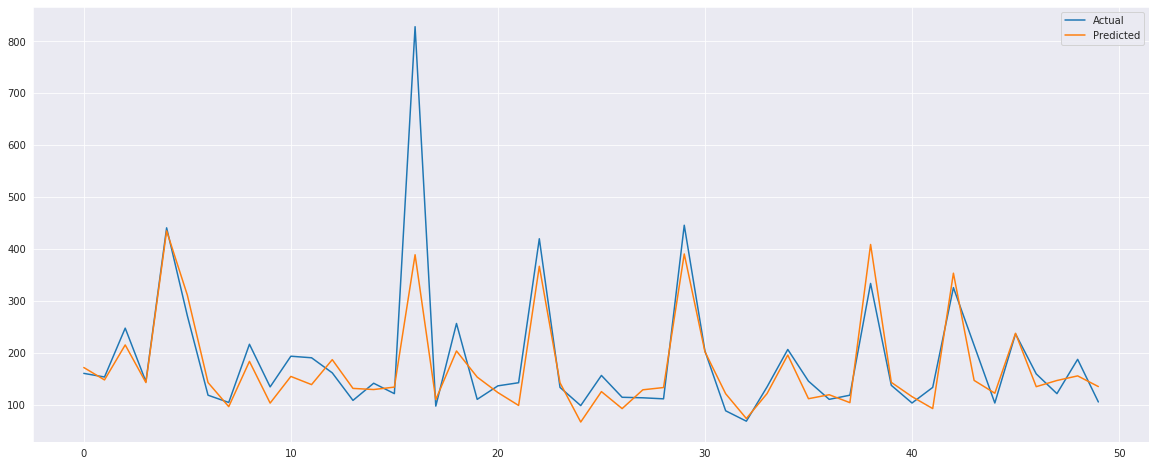

In [18]:
stacked_averaged_models.fit(X_train, y_train)
stacked_train_pred = stacked_averaged_models.predict(X_train)
stacked_pred = stacked_averaged_models.predict(X_test)
# print(y_train,stacked_pred)
df = pd.DataFrame({'Actual':y_test, 'Predicted': stacked_pred})
print(df)
df.plot(figsize=(20,8))



In [19]:
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, stacked_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, stacked_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, stacked_pred)))
print('r ^2 ',r2_score(y_test, stacked_pred))
# print('score',ereg.score(y_test, y_pred))
print('explained_variance_score',explained_variance_score(y_test, stacked_pred))
print('max_error',max_error(y_test, stacked_pred))



Mean Absolute Error: 33.578389434814454
Mean Squared Error: 4775.2843733421005
Root Mean Squared Error: 69.10343242807915
r ^2  0.7028662586939515
explained_variance_score 0.7157340193367097
max_error 438.7861328125
